In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [52]:
master_df = pd.read_pickle('movie_master_dataset_with_inflation.pkl')

In [53]:
master_df.head()

,release_date,movie,production_budget,inf_adj_production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI,person_name,movie_role,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Johnny Depp,actor,...,False,False,False,False,False,False,False,False,False,False
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Geoffrey Rush,actor,...,False,False,False,False,False,False,False,False,False,False
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Penélope Cruz,actress,...,False,False,False,False,False,False,False,False,False,False
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Stuart Beattie,writer,...,False,False,False,False,False,False,False,False,False,False
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Ted Elliott,writer,...,False,False,False,False,False,False,False,False,False,False


In [54]:
master_df['month'] = master_df['release_date'].dt.month

In [55]:
master_df = master_df[master_df['inf_adj_production_budget']>=2.4e7]

## Median ROI Barplot for Each Month

Text(0.5, 1.0, 'Median ROI of All Genres for Each Month')

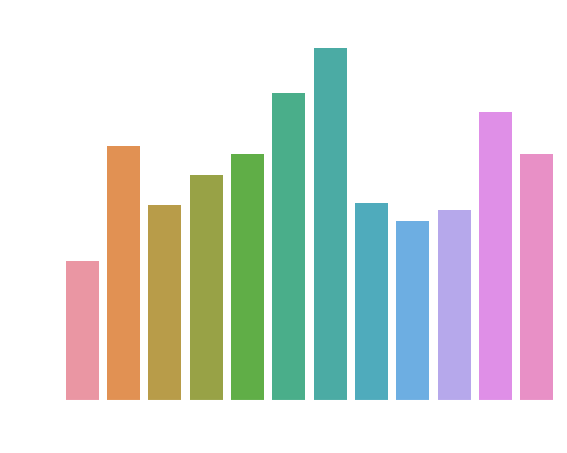

In [56]:
ax = sns.barplot(data=master_df, x = 'month', y='ROI', ci=None)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Median ROI')
ax.set_xlabel('Month')
ax.set_title('Median ROI of All Genres for Each Month')

## Median ROI of Combined Action, Adventure, Comedy for Each Month

{'axes.facecolor': 'white', 'axes.edgecolor': 'w', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'w', 'figure.facecolor': 'white', 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'w', 'xtick.color': 'w', 'ytick.color': 'w', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>, 'patch.edgecolor': 'black', 'patch.force_edgecolor': False, 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


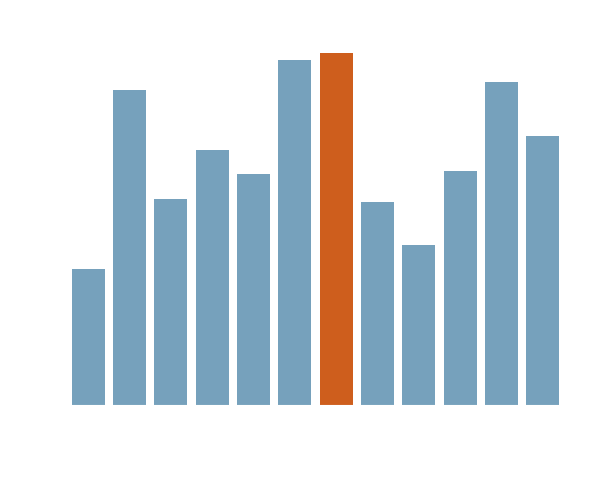

In [58]:
# colors=['#eb5600', '#c2882b']
sns.set_style(rc={'axes.edgecolor': 'w','text.color': 'w','xtick.color': 'w','ytick.color': 'w', 'axes.labelcolor':'w'})
# total_gross_per_genre = pd.DataFrame({'genre':x_axis, 'total_worldwide_gross':y_axis})
# bar = sns.barplot(data=total_gross_per_genre.iloc[:10], x = 'genre', y='total_worldwide_gross', 
#                   palette = ['#eb5600', '#eb5600', '#eb5600', '#6aa4c8', '#6aa4c8', '#6aa4c8', '#6aa4c8',
#                             '#6aa4c8', '#6aa4c8', '#6aa4c8'])
bar = sns.barplot(data=master_df[(master_df['Adventure'] == True) | (master_df['Action'] == True) 
                                | (master_df['Drama'] == True) & (master_df['inf_adj_production_budget'] > 2.4e7)],
                                                                   x = 'month', y='ROI', ci=None, 
                 palette = ['#6aa4c8', '#6aa4c8', '#6aa4c8',
                            '#6aa4c8', '#6aa4c8', '#6aa4c8', '#eb5600', '#6aa4c8', '#6aa4c8', '#6aa4c8'])
bar.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
                    rotation=90, horizontalalignment='center')
# ylabels = ['\$' + '{:,.0f}'.format(y/1e9) + 'B' for y in bar.get_yticks()]
# bar.set_yticklabels(ylabels)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Median ROI', fontsize=15)
plt.title('Monthly Median ROI: Action + Adventure + Comedy', fontsize=16)

fig = bar.get_figure()

print(sns.axes_style())

fig.savefig('median_roi_by_year_act_adv_com.png', transparent=True, bbox_inches='tight', pad_inches=.15, dpi=300)

{'axes.facecolor': 'white', 'axes.edgecolor': 'w', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'w', 'figure.facecolor': 'white', 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'w', 'xtick.color': 'w', 'ytick.color': 'w', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>, 'patch.edgecolor': 'black', 'patch.force_edgecolor': False, 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


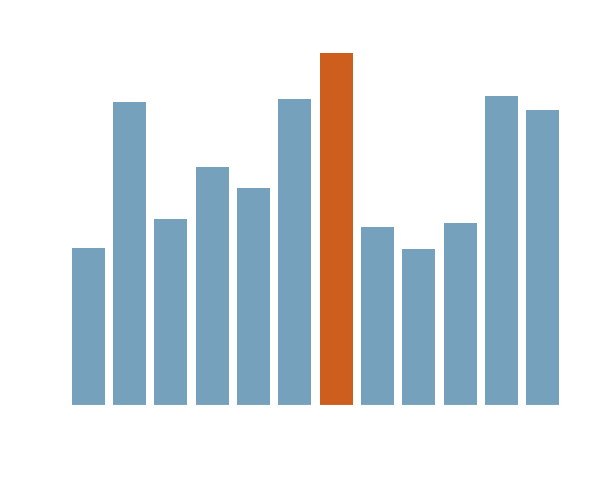

In [48]:
# colors=['#eb5600', '#c2882b']
sns.set_style(rc={'axes.edgecolor': 'w','text.color': 'w','xtick.color': 'w','ytick.color': 'w', 'axes.labelcolor':'w'})
# total_gross_per_genre = pd.DataFrame({'genre':x_axis, 'total_worldwide_gross':y_axis})
# bar = sns.barplot(data=total_gross_per_genre.iloc[:10], x = 'genre', y='total_worldwide_gross', 
#                   palette = ['#eb5600', '#eb5600', '#eb5600', '#6aa4c8', '#6aa4c8', '#6aa4c8', '#6aa4c8',
#                             '#6aa4c8', '#6aa4c8', '#6aa4c8'])
bar = sns.barplot(data=master_df[(master_df['Adventure'] == True) | (master_df['Action'] == True) 
                                | (master_df['Drama'] == True)], x = 'month', y='ROI', ci=None, 
                 palette = ['#6aa4c8', '#6aa4c8', '#6aa4c8',
                            '#6aa4c8', '#6aa4c8', '#6aa4c8', '#eb5600', '#6aa4c8', '#6aa4c8', '#6aa4c8'])
bar.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
                    rotation=90, horizontalalignment='center')
# ylabels = ['\$' + '{:,.0f}'.format(y/1e9) + 'B' for y in bar.get_yticks()]
# bar.set_yticklabels(ylabels)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Median ROI', fontsize=15)
plt.title('Monthly Median ROI: Action + Adventure + Comedy', fontsize=16)

fig = bar.get_figure()

print(sns.axes_style())

fig.savefig('median_roi_by_year_act_adv_com.png', transparent=True, bbox_inches='tight', pad_inches=.15, dpi=300)

Text(0.5, 1.0, 'Median ROI of Combined Action, Adventure, Comedy for Each Month')

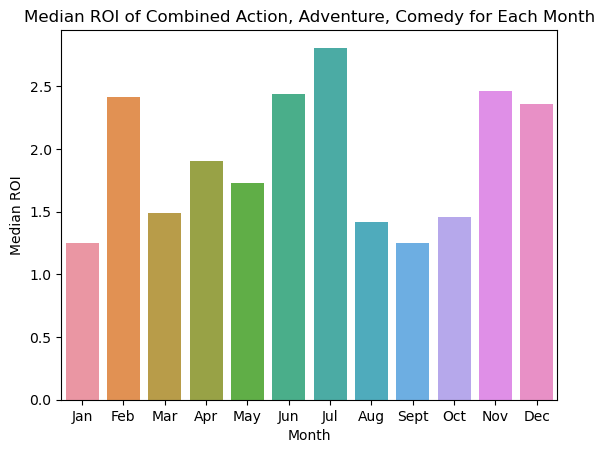

In [27]:
ax = sns.barplot(data=master_df[(master_df['Adventure'] == True) | (master_df['Action'] == True) 
                                | (master_df['Drama'] == True)], x = 'month', y='ROI', ci=None)


ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Median ROI')
ax.set_xlabel('Month')
ax.set_title('Median ROI of Combined Action, Adventure, Comedy for Each Month')

Text(0.5, 1.0, 'Median ROI of Combined Action, Adventure, Comedy for Each Month')

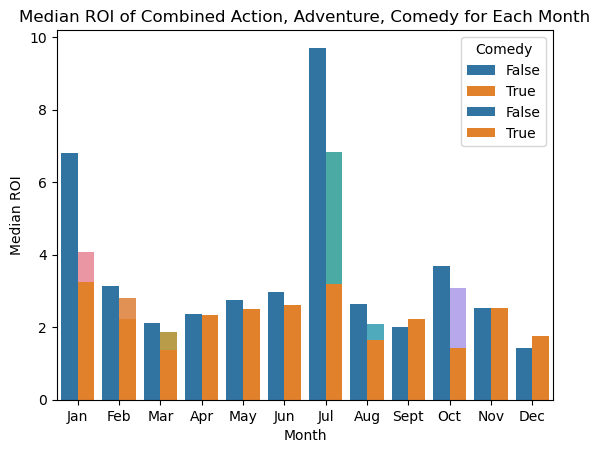

In [24]:
ax = sns.barplot(data=master_df, x = 'month', y='ROI', ci=None)
ax = sns.barplot(data=master_df, x = 'month', y='ROI', hue='Action', ci=None)
ax = sns.barplot(data=master_df, x = 'month', y='ROI', hue='Comedy', ci=None)


ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Median ROI')
ax.set_xlabel('Month')
ax.set_title('Median ROI of Combined Action, Adventure, Comedy for Each Month')

In [ ]:
# Selecting importance of actor vs. actress vs. director vs. producer vs. writer according to mean ROI of each one